In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

### Задание 1

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
print(salary)

[100  80  75  77  89  33  45  25  65  17  30  24  57  55  70  75  65  84
  90 150]


#### Среднее арифметическое:

In [3]:
mean_salary = salary.sum() / len(salary)
mean_salary

65.3

#### Среднее квадратичное отклонение:

In [4]:
std_salary = np.sqrt(((salary - mean_salary) ** 2).sum() / len(salary))
std_salary

30.823854398825596

#### Смещенная оценка дисперсии

In [5]:
biased_var_salary = ((salary - mean_salary) ** 2).sum() / len(salary)
biased_var_salary

950.11

#### Несмещенная оценка дисперсии

In [6]:
unbiased_var_salary = ((salary - mean_salary) ** 2).sum() / (len(salary) - 1)
unbiased_var_salary

1000.1157894736842

#### Проверка встроенными методами:

In [7]:
mean_salary_check = salary.mean()
mean_salary == mean_salary_check

True

In [8]:
std_salary_check = salary.std(ddof=0)
std_salary == std_salary_check

True

In [9]:
biased_var_salary_check = salary.var(ddof=0)
biased_var_salary == biased_var_salary_check

True

In [10]:
unbiased_var_salary_check = salary.var(ddof=1)
unbiased_var_salary == unbiased_var_salary_check

True

### Задание 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

In [11]:
salary_df = pd.DataFrame(salary, columns=['salary'])
salary_df

,salary
0,100
1,80
2,75
3,77
4,89
5,33
6,45
7,25
8,65
9,17


<AxesSubplot:>

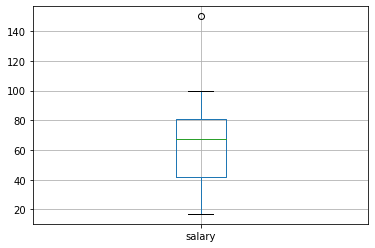

In [12]:
salary_df[['salary']].boxplot()

In [13]:
q1 = salary_df['salary'].quantile(0.25)
q1

42.0

In [14]:
q3 = salary_df['salary'].quantile(0.75)
q3

81.0

In [15]:
iqr_length = q3 - q1
iqr_length

39.0

In [16]:
boxplot_range = (q1 - 1.5 * iqr_length, q3 + 1.5 * iqr_length)
boxplot_range

(-16.5, 139.5)

In [17]:
outliers = salary_df.loc[(salary_df['salary'] < boxplot_range[0]) | (salary_df['salary'] > boxplot_range[1])]

outliers.shape[0]

1

Доля выбросов:

In [18]:
outliers.shape[0] / salary_df.shape[0]

0.05

### Задание 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Обозначим событие "студент сдал первую сессию" как $X$, вероятность которого представляет собой полную вероятность с учетом всех факультетов. Условные вероятности события $X$ по отношению к каждому факультету можно получить как отношение количества участников в каждом факультете к общему количеству студентов. Обозначим количесво студентов факультета $A$ как $a$, тогда, исходя из условия задачи, общее количество студентов равно $4a$ и вероятности соответственно:

$$P(X\:|\:A) = \frac{a}{4a} = \frac{1}{4}$$

$$P(X\:|\:B) = \frac{a}{4a} = \frac{1}{4}$$

$$P(X\:|\:C) = \frac{2a}{4a} = \frac{1}{2}$$ 

Таким образом $P(X)$ равно:

In [19]:
P_X = 1 / 4 * 0.8 + 1 / 4 * 0.7 + 1 / 2 * 0.9
P_X

0.825

Вероятности того, что студент учится на определенном факультете считаем по формуле Байеса:

#### a) на факультете А

In [20]:
round(((1 / 4 * 0.8) / P_X), 2)

0.24

#### б) на факультете В

In [21]:
round(((1 / 4 * 0.7) / P_X), 2)

0.21

#### в) на факультете С

In [22]:
round(((1 / 2 * 0.9) / P_X), 2)

0.55